In [5]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


In [6]:
# Reading the white wines dataset from uci
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",sep=";")

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#### null values check:

In [7]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

#### Co-relation check:

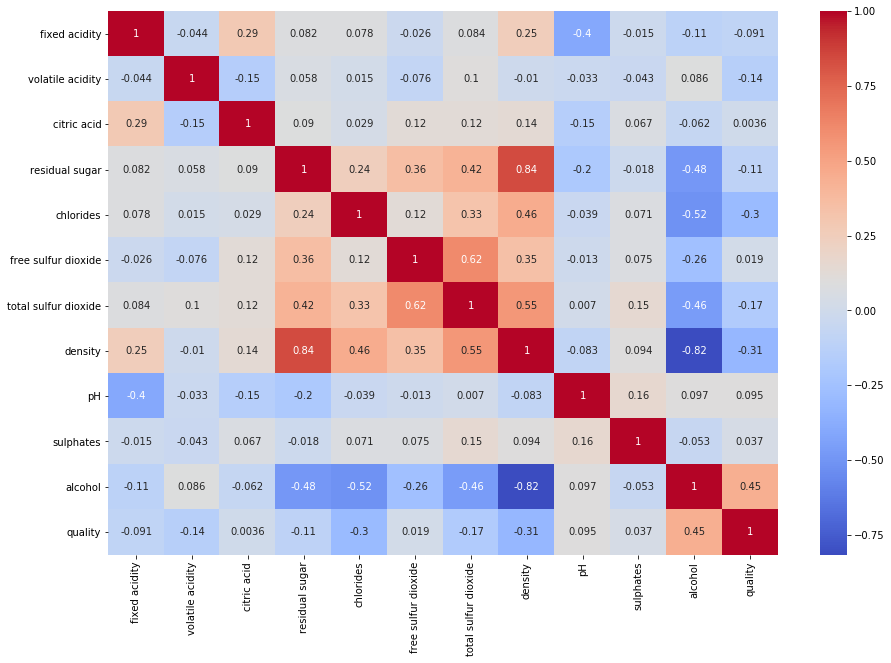

In [9]:

plt.subplots(figsize=(15, 10))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')


In [1]:
X = np.asarray(df.iloc[:,:-1])
y = np.asarray(df.iloc[:,-1])


In [13]:
# Standardize the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.20405985, -0.01585446,  0.33228199,  2.8837046 ,  0.15636646,
         0.65806528,  0.78477047,  2.41896215, -1.3110488 , -0.33575895,
        -1.41798425],
       [-0.68630841,  0.33258131,  0.1344384 , -0.97240702,  0.49803497,
        -1.35287326, -0.13584071,  0.01124404,  0.78056932,  0.04215411,
        -0.84669787],
       [ 1.60320999,  0.1002908 ,  0.72796916,  0.09761348,  0.5834521 ,
        -0.3149695 , -0.98377206,  0.38959974,  0.5016869 , -0.43023721,
        -0.35702383],
       [ 0.45845079, -0.48043549, -0.06340519,  0.42063854,  1.26678914,
         0.78780325,  1.17239622,  0.56157961,  0.01364268, -0.80815027,
        -0.52024851],
       [ 0.45845079, -0.48043549, -0.06340519,  0.42063854,  1.26678914,
         0.78780325,  1.17239622,  0.56157961,  0.01364268, -0.80815027,
        -0.52024851]])

In [2]:
# Split the datasetfor training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


#### Logistic Regression



In [19]:
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression(multi_class='multinomial',solver ='newton-cg')
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)

# classification report for test data
print(metrics.classification_report(y_test, y_pred, digits=3, zero_division = 1))
print('accuracy',accuracy_score(y_test, y_pred))

# Cross validation score with 'roc_auc_ovr' scoring and 10 folds
accuracy = cross_val_score(logreg, X, y, scoring = 'roc_auc_ovr',cv=10)
print('cross validation score with roc_auc',accuracy.mean())

# Calculate roc_auc score with multiclass parameter
print('roc_auc_score',roc_auc_score(y_test,logreg.predict_proba(X_test), multi_class='ovr'))

              precision    recall  f1-score   support

           4      1.000     0.000     0.000        27
           5      0.580     0.470     0.519       270
           6      0.513     0.745     0.608       411
           7      0.458     0.228     0.304       167
           8      1.000     0.000     0.000        23

    accuracy                          0.524       898
   macro avg      0.710     0.288     0.286       898
weighted avg      0.550     0.524     0.491       898

accuracy 0.5244988864142539
cross validation score with roc_auc 0.742497984671654
roc_auc_score 0.7538056699952047


#### Adding polynomial features to the logistic regression

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Add polynomial features to the logistic regression model
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LogisticRegression(multi_class='multinomial',solver ='newton-cg', **kwargs))

In [21]:
# Train and fit the 2nd degree polynomial model
poly = PolynomialRegression(2)
poly.fit(X_train,y_train)

y_pred = poly.predict(X_test)

print(metrics.classification_report(y_test, y_pred, digits=3))

# Cross validation score with 'roc_auc_ovr' scoring and 10 folds
accuracy = cross_val_score(poly, X, y, scoring = 'roc_auc_ovr',cv=10)
print('cross validation score with roc_auc_ovr scoring',accuracy.mean())

# Cross validation score with multiclass
print('roc_auc_score',roc_auc_score(y_test,poly.predict_proba(X_test), multi_class='ovr'))

              precision    recall  f1-score   support

           4      0.444     0.148     0.222        27
           5      0.567     0.504     0.533       270
           6      0.519     0.652     0.578       411
           7      0.481     0.371     0.419       167
           8      0.250     0.043     0.074        23

    accuracy                          0.524       898
   macro avg      0.452     0.344     0.365       898
weighted avg      0.517     0.524     0.511       898

cross validation score with roc_auc_ovr scoring 0.7361869190030527
roc_auc_score 0.7691254813141014


### Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

# Classification report
print(metrics.classification_report(y_test, y_pred.round(), digits=3))

# Cross validation score with 'roc_auc_ovr' scoring and 10 folds
accuracy = cross_val_score(tree, X, y,scoring = 'roc_auc_ovr',cv=10)
print('cross validation score with roc_auc_ovr scoring',accuracy.mean())

# Cross validation score with multiclass
print('roc_auc_score',roc_auc_score(y_test,tree.predict_proba(X_test), multi_class='ovr'))

              precision    recall  f1-score   support

           4      0.429     0.333     0.375        27
           5      0.662     0.589     0.624       270
           6      0.659     0.672     0.665       411
           7      0.570     0.611     0.590       167
           8      0.308     0.522     0.387        23

    accuracy                          0.621       898
   macro avg      0.525     0.545     0.528       898
weighted avg      0.627     0.621     0.623       898

cross validation score with roc_auc_ovr scoring 0.5678725235747779
roc_auc_score 0.7153687686161947


#### Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100,random_state = 0)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

# Calssification report
print(metrics.classification_report(y_test, y_pred.round(), digits=3))

# Cross validation score with 'roc_auc_ovr' scoring and 10 folds
accuracy = cross_val_score(forest, X, y,scoring = 'roc_auc_ovr',cv=10)
print('cross validation score with roc_auc_ovr scoring',accuracy.mean())

# Cross validation score with multiclass
print('roc_auc_score',roc_auc_score(y_test,forest.predict_proba(X_test), multi_class='ovr'))

              precision    recall  f1-score   support

           4      0.714     0.185     0.294        27
           5      0.742     0.670     0.704       270
           6      0.662     0.815     0.731       411
           7      0.679     0.533     0.597       167
           8      1.000     0.435     0.606        23

    accuracy                          0.690       898
   macro avg      0.760     0.528     0.586       898
weighted avg      0.699     0.690     0.682       898

cross validation score with roc_auc_ovr scoring 0.7565877389842213
roc_auc_score 0.8903611822230715
